# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [40]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize

In [2]:
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
penguins = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)
print(penguins.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
3  Adelie             NaN            NaN                NaN          NaN   
4  Adelie            36.7           19.3              193.0       3450.0   

   island_Dream  island_Torgersen  sex_Male  
0             0                 1         1  
1             0                 1         0  
2             0                 1         0  
3             0                 1         0  
4             0                 1         0  


In [4]:
penguins.isnull().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64

In [5]:
penguins = penguins.dropna()
penguins.isnull().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# KNN: kNN models


In [6]:
X = penguins.drop('species', axis=1)
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K = 5

In [7]:
knn_model_5 = KNeighborsClassifier(n_neighbors=5)

knn_model_5.fit(X_train, y_train)

y_pred_5 = knn_model_5.predict(X_test)
y_prob_5 = knn_model_5.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[32  1  2]
 [11  1  0]
 [ 1  0 21]]


In [8]:
accuracy_5 = accuracy_score(y_test, y_pred_5)
print("Overall Accuracy: ")
print(round(accuracy_5, 2))

Overall Accuracy: 
0.78


In [9]:
report_5 = classification_report(y_test, y_pred_5)
print(report_5)

              precision    recall  f1-score   support

      Adelie       0.73      0.91      0.81        35
   Chinstrap       0.50      0.08      0.14        12
      Gentoo       0.91      0.95      0.93        22

    accuracy                           0.78        69
   macro avg       0.71      0.65      0.63        69
weighted avg       0.75      0.78      0.73        69



In [10]:
auc_scores_by_species_5 = {}
for i in range(y_prob_5.shape[1]):
    species = knn_model_5.classes_[i]
    auc_score_5 = roc_auc_score(y_test == species, y_prob_5[:, i])
    auc_scores_by_species_5[species] = auc_score_5
    print(f"{species} AUC: {auc_score_5:.2f}")

Adelie AUC: 0.83
Chinstrap AUC: 0.77
Gentoo AUC: 0.99


### K = 25

In [11]:
knn_model_25 = KNeighborsClassifier(n_neighbors=25)

knn_model_25.fit(X_train, y_train)

y_pred_25 = knn_model_25.predict(X_test)
y_prob_25 = knn_model_25.predict_proba(X_test)

Confusion Matrix:
[[32  0  3]
 [11  1  0]
 [ 3  0 19]]


In [ ]:
cm = confusion_matrix(y_test, y_pred_25)
print("Confusion Matrix:")
print(cm)

In [12]:
accuracy_25 = accuracy_score(y_test, y_pred_25)
print("Overall Accuracy: ")
print(round(accuracy_25, 2))

Overall Accuracy: 
0.75


In [13]:
report_25 = classification_report(y_test, y_pred_25)
print(report_25)

              precision    recall  f1-score   support

      Adelie       0.70      0.91      0.79        35
   Chinstrap       1.00      0.08      0.15        12
      Gentoo       0.86      0.86      0.86        22

    accuracy                           0.75        69
   macro avg       0.85      0.62      0.60        69
weighted avg       0.80      0.75      0.70        69



In [14]:
auc_scores_by_species_25 = {}
for i in range(y_prob_25.shape[1]):
    species = knn_model_25.classes_[i]
    auc_score_25 = roc_auc_score(y_test == species, y_prob_25[:, i])
    auc_scores_by_species_25[species] = auc_score_25
    print(f"{species} AUC: {auc_score_25:.2f}")

Adelie AUC: 0.82
Chinstrap AUC: 0.79
Gentoo AUC: 0.98


# Decision Trees

### Max Depth = 1


In [31]:
tree_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_1.fit(X, y)
y_pred_1 = tree_1.predict(X_test)

In [32]:
cm_1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(cm_1)

Confusion Matrix:
[[35  0  0]
 [12  0  0]
 [ 0  0 22]]


In [35]:
accuracy_tree_1 = accuracy_score(y_test, y_pred_1)
print("Overall Accuracy: ")
print(round(accuracy_tree_1, 2))

Overall Accuracy: 
0.83


In [33]:
report_1 = classification_report(y_test, y_pred_1)
print("Classification Report:")
print(report_1)

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.74      1.00      0.85        35
   Chinstrap       0.00      0.00      0.00        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.83        69
   macro avg       0.58      0.67      0.62        69
weighted avg       0.70      0.83      0.75        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
y_prob_1 = tree_1.predict_proba(X_test)
auc_scores_by_species_1 = {}
for i in range(y_prob_1.shape[1]):
    species = tree_1.classes_[i]
    auc_score_1 = roc_auc_score(y_test == species, y_prob_1[:, i])
    auc_scores_by_species_1[species] = auc_score_1
    print(f"{species} AUC: {auc_score_1:.2f}")

Adelie AUC: 0.82
Chinstrap AUC: 0.69
Gentoo AUC: 1.00


### Max Depth = 3

In [15]:
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_3.fit(X, y)
y_pred_3 = tree_3.predict(X_test)

In [20]:
cm_3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix:")
print(cm_3)

Confusion Matrix:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]


In [16]:
accuracy_tree_3 = accuracy_score(y_test, y_pred_3)
print("Overall Accuracy: ")
print(round(accuracy_tree_3, 2))

Accuracy: 
0.96


In [21]:
report_3 = classification_report(y_test, y_pred_3)
print("Classification Report:")
print(report_3)

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.96        35
   Chinstrap       0.91      0.83      0.87        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.96        69
   macro avg       0.95      0.93      0.94        69
weighted avg       0.96      0.96      0.96        69



In [22]:
y_prob_3 = tree_3.predict_proba(X_test)
auc_scores_by_species_3 = {}
for i in range(y_prob_3.shape[1]):
    species = tree_3.classes_[i]
    auc_score_3 = roc_auc_score(y_test == species, y_prob_3[:, i])
    auc_scores_by_species_3[species] = auc_score_3
    print(f"{species} AUC: {auc_score_3:.2f}")

Adelie AUC: 0.99
Chinstrap AUC: 0.99
Gentoo AUC: 1.00


# ROC



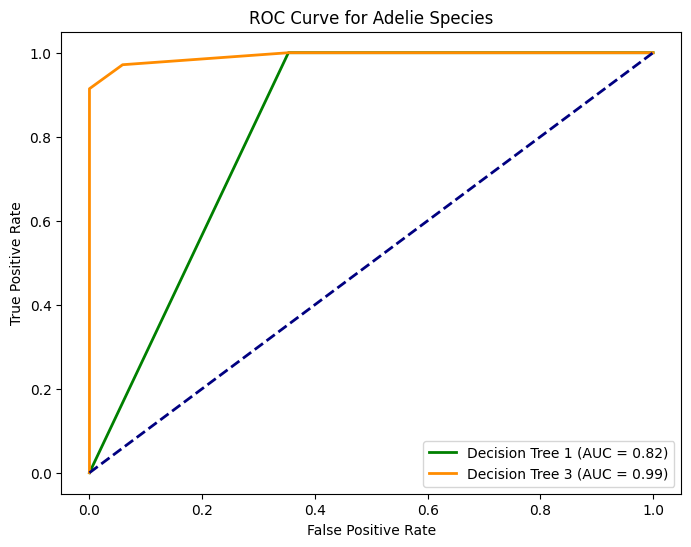

In [45]:
# Binarize the target variable for Adelie class
y_test_bin_adelie = label_binarize(y_test, classes=['Adelie', 'Chinstrap', 'Gentoo'])[:, 0]

y_prob_1 = tree_1.predict_proba(X_test)[:, 0]
y_prob_3 = tree_3.predict_proba(X_test)[:, 0]

fpr_1, tpr_1, _ = roc_curve(y_test_bin_adelie, y_prob_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_3, tpr_3, _ = roc_curve(y_test_bin_adelie, y_prob_3)
roc_auc_3 = auc(fpr_3, tpr_3)


plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Decision Tree 1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_3, tpr_3, color='darkorange', lw=2, label=f'Decision Tree 3 (AUC = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Adelie Species')
plt.legend(loc='lower right')
plt.show()